In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline
import numpy as np

In [8]:
pd.set_option('display.max_row',100)
df=pd.read_csv('spam.csv', encoding='latin-1')
df.head(100)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [9]:
df.describe()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [10]:
df.shape

(5572, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [62]:
df_drop = df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis=1)
df_new.head(50)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [23]:
df_new.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [31]:
#Sorry, I'll call later" appears only 30 times here =)
# Please call our customer service representativ... appears 4 times here
#from this groupby function i fouynd that there are 4825 ham messages and 747 spam messages in this data set from which 4516ham and 653 spam messages are unique.

In [32]:
df_new['length'] = df_new['message'].apply(len)
df_new.head(50)

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A66B6A57C0>,
      dtype=object)

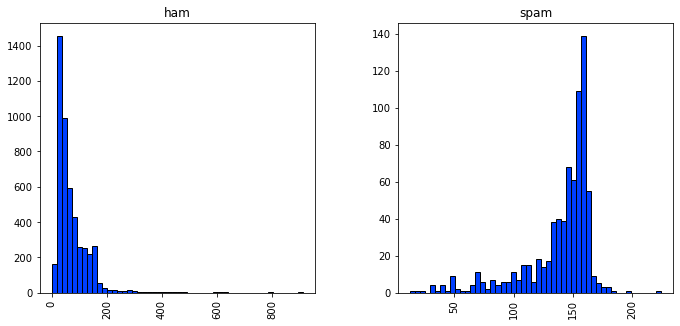

In [34]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df_new.hist(column='length', by='class', bins=50,figsize=(11,5))

In [40]:
# Text processing and vectorizing our meddages¶
# Let's create new data frame. We'll need a copy later on

text_feat = df_new['message'].copy()

In [41]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)
    

In [39]:
text_feat = text_feat.apply(text_process)

In [42]:
vectorizer = TfidfVectorizer("english")

In [44]:
features = vectorizer.fit_transform(text_feat)

In [47]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df_new['class'], test_size=0.3, random_state=111)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [60]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [61]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [62]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [63]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [64]:
df_now = pd.DataFrame.from_dict(dict(pred_scores), orient='index', columns=['Score'])
df_now

,Score
SVC,0.985048
KN,0.944976
NB,0.989833
DT,0.969498
LR,0.959928
RF,0.980263
AdaBoost,0.980861
BgC,0.974282
ETC,0.981459


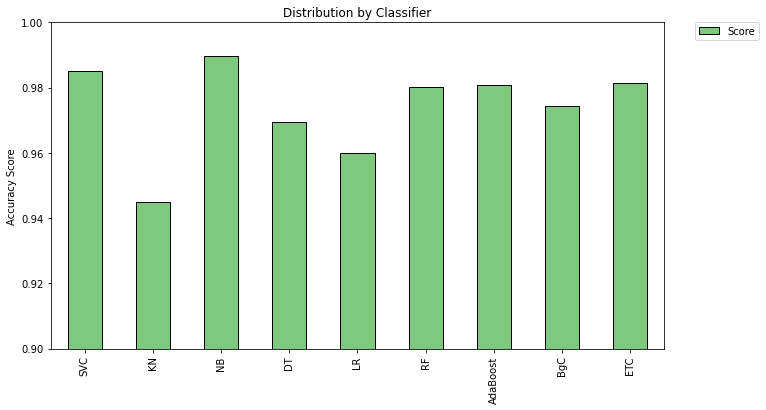

In [65]:
df_now.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_now.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [66]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [67]:
text_feat = text_feat.apply(stemmer)

In [68]:
features = vectorizer.fit_transform(text_feat)

In [71]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df_new['class'], test_size=0.3, random_state=111)

In [72]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [73]:
df_now2 = pd.DataFrame.from_dict(dict(pred_scores), orient='index', columns=['Score1'])
df_now2 = pd.concat([df_now,df_now2],axis=1)
df_now2

,Score,Score1
SVC,0.985048,0.984450
KN,0.944976,0.943182
NB,0.989833,0.989833
DT,0.969498,0.961124
LR,0.959928,0.955742
RF,0.980263,0.978469
AdaBoost,0.980861,0.975478
BgC,0.974282,0.971292
ETC,0.981459,0.979665


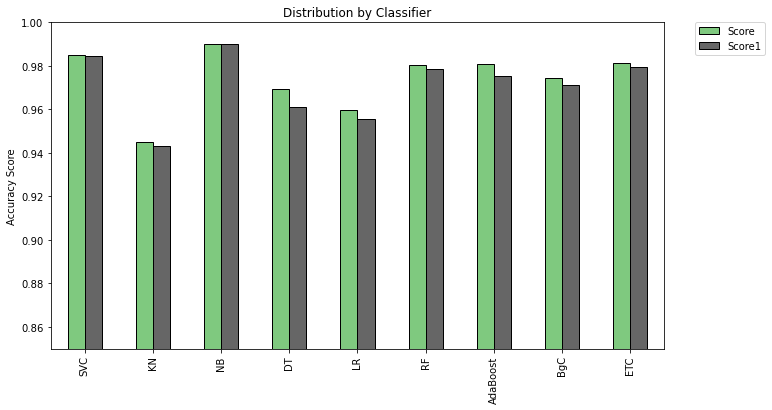

In [74]:
df_now2.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_now2.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [75]:
lf = df_new['length']
lf.to_numpy()
newfeat = np.hstack((features.todense(),lf[:, None]))

In [76]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df_new['class'], test_size=0.3, random_state=111)

In [77]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [78]:
df_now3 = pd.DataFrame.from_dict(dict(pred_scores), orient='index', columns=['Score3'])
df_now3 = pd.concat([df_now2,df_now3],axis=1)
df_now3

,Score,Score1,Score3
SVC,0.985048,0.984450,0.861244
KN,0.944976,0.943182,0.892344
NB,0.989833,0.989833,0.987440
DT,0.969498,0.961124,0.965909
LR,0.959928,0.955742,0.970694
RF,0.980263,0.978469,0.977273
AdaBoost,0.980861,0.975478,0.976077
BgC,0.974282,0.971292,0.973086
ETC,0.981459,0.979665,0.978469


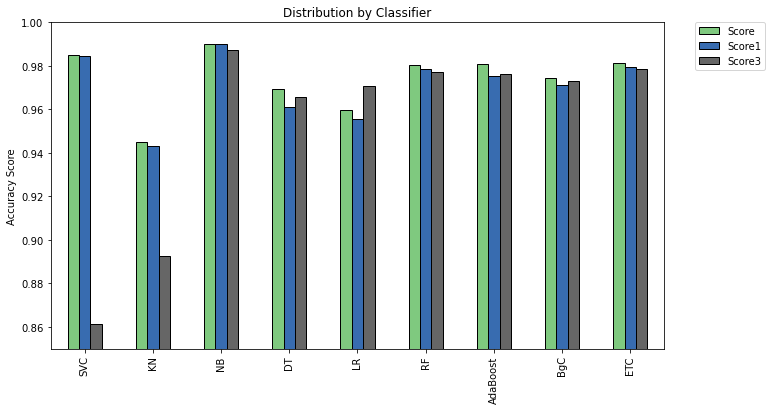

In [79]:
df_now3.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_now2.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)